<a href="https://colab.research.google.com/github/Marcusng88/WIA1007-Intro-to-DS/blob/main/tutorial7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd


In [4]:
df_salary = pd.read_csv('/content/drive/MyDrive/Dataset/salary_cleaned.csv')
df_xtra_info = pd.read_csv('/content/drive/MyDrive/Dataset/xtra_info.csv')

In [5]:
print(len(df_salary))
print(len(df_xtra_info))

13404
13404


In [6]:
df_master = pd.concat([df_salary,df_xtra_info],axis = 1)
print(len(df_master))
df_master.head()

13404


,USERID,Timestamp,Age,Industry,Job title,Salary,Compensation,Currency,Country,State,City,Overall years of experience,Years of experience in current job,Education level,Gender,USERID,CGPA,Salary_month_USD,Special Bonus_GBP
0,8683,4/27/2021 11:02:10,25-34,Education (Higher Education),Research and Instruction Librarian,55000.0,0.0,USD,United States,Massachusetts,Boston,5-7 years,5-7 years,Master's degree,Woman,8683,2.990627,4583.333333,2437.0
1,3880,4/27/2021 11:02:41,25-34,Nonprofits,Program Manager,62000.0,3000.0,USD,USA,Wisconsin,Milwaukee,8 - 10 years,5-7 years,College degree,Woman,3880,2.288131,5166.666667,740.0
2,8898,4/27/2021 11:02:42,25-34,"Accounting, Banking & Finance",Accounting Manager,60000.0,7000.0,USD,US,South Carolina,Greenville,8 - 10 years,5-7 years,College degree,Woman,8898,3.903324,5000.000000,3806.0
3,4441,4/27/2021 11:03:01,45-54,Computing or Tech,Systems Analyst,112000.0,10000.0,USD,US,Missouri,St. Louis,21 - 30 years,21 - 30 years,College degree,Woman,4441,2.470852,9333.333333,4691.0
4,7537,4/27/2021 11:03:02,35-44,"Accounting, Banking & Finance",Senior Accountant,45000.0,0.0,USD,United States,Florida,Palm Coast,21 - 30 years,21 - 30 years,College degree,Woman,7537,3.559457,3750.000000,4580.0


In [7]:
df_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13404 entries, 0 to 13403
Data columns (total 19 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   USERID                              13404 non-null  int64  
 1   Timestamp                           13403 non-null  object 
 2   Age                                 13403 non-null  object 
 3   Industry                            13403 non-null  object 
 4   Job title                           13403 non-null  object 
 5   Salary                              13403 non-null  float64
 6   Compensation                        13403 non-null  float64
 7   Currency                            13403 non-null  object 
 8   Country                             13403 non-null  object 
 9   State                               13403 non-null  object 
 10  City                                13403 non-null  object 
 11  Overall years of experience         13403

In [10]:
df_master.drop(columns=['USERID'],inplace = True)
df_master.columns

Index(['Timestamp', 'Age', 'Industry', 'Job title', 'Salary', 'Compensation',
       'Currency', 'Country', 'State', 'City', 'Overall years of experience',
       'Years of experience in current job', 'Education level', 'Gender',
       'CGPA', 'Salary_month_USD', 'Special Bonus_GBP'],
      dtype='object')

#univariate

#numerical data

In [11]:
#need this for scatter later
df_numerical = df_master.select_dtypes(include='number')

In [12]:
df_numerical.describe()

,Salary,Compensation,CGPA,Salary_month_USD,Special Bonus_GBP
count,13403.000000,13403.000000,13403.000000,13403.000000,13403.000000
mean,81539.461315,4155.284936,2.992438,6794.955110,2501.569798
std,28134.315890,5778.882891,0.575155,2344.526324,1438.749945
min,37860.000000,0.000000,2.000039,3155.000000,0.000000
25%,59000.000000,0.000000,2.500295,4916.666667,1264.500000
50%,76000.000000,1500.000000,2.984247,6333.333333,2506.000000
75%,100000.000000,6000.000000,3.484162,8333.333333,3761.500000
max,151374.000000,25500.000000,3.999992,12614.500000,5000.000000


In [13]:
#if the median< mean ,is the distribution skewed to the left or right ?

#histograms and boxplots

<Axes: >

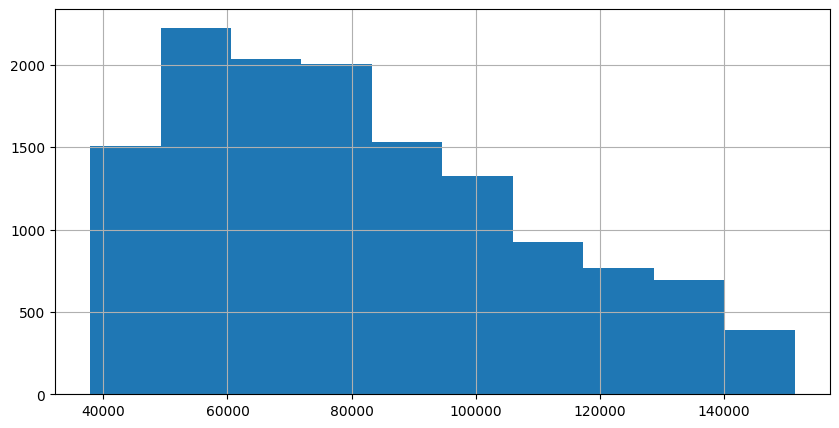

In [15]:
df_master['Salary'].hist(figsize=(10,5))


<Axes: >

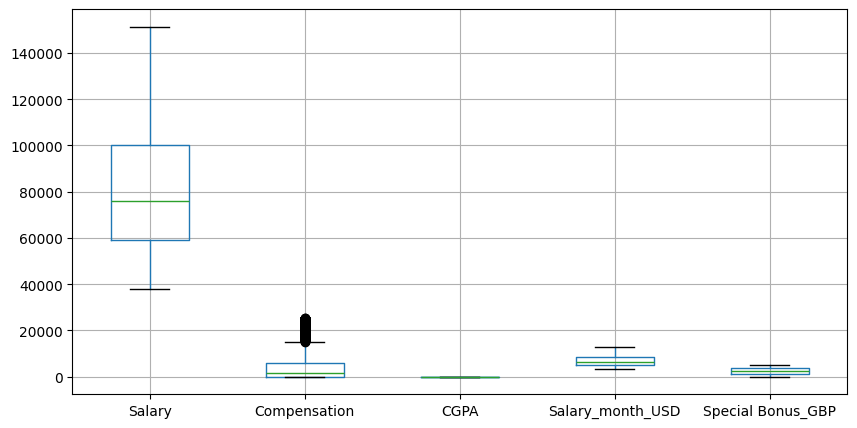

In [16]:
df_master.boxplot(figsize = (10,5))

<Axes: >

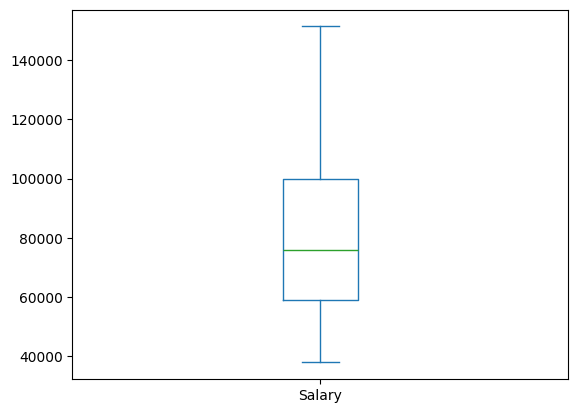

In [18]:
df_master['Salary'].plot(kind='box')

In [20]:
df_categorical = df_master.select_dtypes(include = 'object')
df_categorical.head()

,Timestamp,Age,Industry,Job title,Currency,Country,State,City,Overall years of experience,Years of experience in current job,Education level,Gender
0,4/27/2021 11:02:10,25-34,Education (Higher Education),Research and Instruction Librarian,USD,United States,Massachusetts,Boston,5-7 years,5-7 years,Master's degree,Woman
1,4/27/2021 11:02:41,25-34,Nonprofits,Program Manager,USD,USA,Wisconsin,Milwaukee,8 - 10 years,5-7 years,College degree,Woman
2,4/27/2021 11:02:42,25-34,"Accounting, Banking & Finance",Accounting Manager,USD,US,South Carolina,Greenville,8 - 10 years,5-7 years,College degree,Woman
3,4/27/2021 11:03:01,45-54,Computing or Tech,Systems Analyst,USD,US,Missouri,St. Louis,21 - 30 years,21 - 30 years,College degree,Woman
4,4/27/2021 11:03:02,35-44,"Accounting, Banking & Finance",Senior Accountant,USD,United States,Florida,Palm Coast,21 - 30 years,21 - 30 years,College degree,Woman


<Axes: xlabel='Industry'>

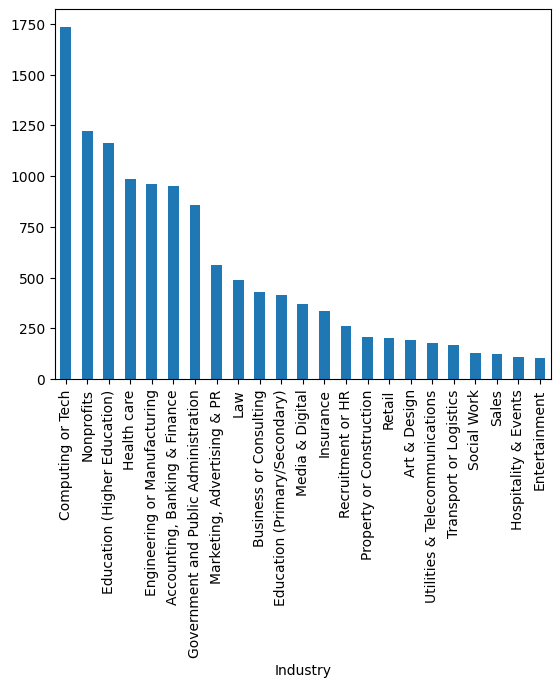

In [23]:
#value count counts for occurence of all unique value,work on pandas series
# df_categorical['Industry'].value_counts().plot(kind='bar')
# df_categorical['Industry'].value_counts().plot(kind ='pie')
x = df_categorical['Industry'].value_counts()
x[x>100].plot(kind = 'bar')

In [24]:
#returns the index (label) of the first occurrence
#of the maximum value in the specified axis.
print(x.idxmax())

Computing or Tech


In [25]:
#convert series to dataframe with column name 'count'
x_df = x.to_frame(name='Count')

In [27]:
x_df['Percentage'] = x_df['Count']/x_df['Count'].sum() * 100

<Axes: xlabel='Industry'>

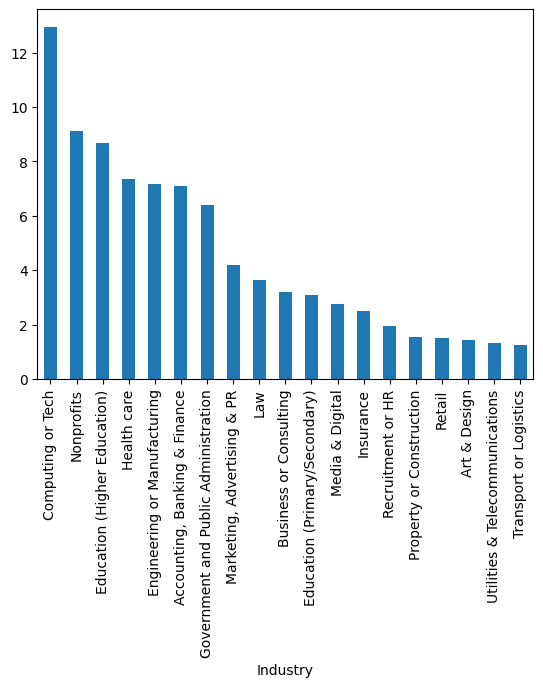

In [30]:
x_df[x_df['Percentage']>1]['Percentage'].plot(kind='bar')

# bivariate analysis

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

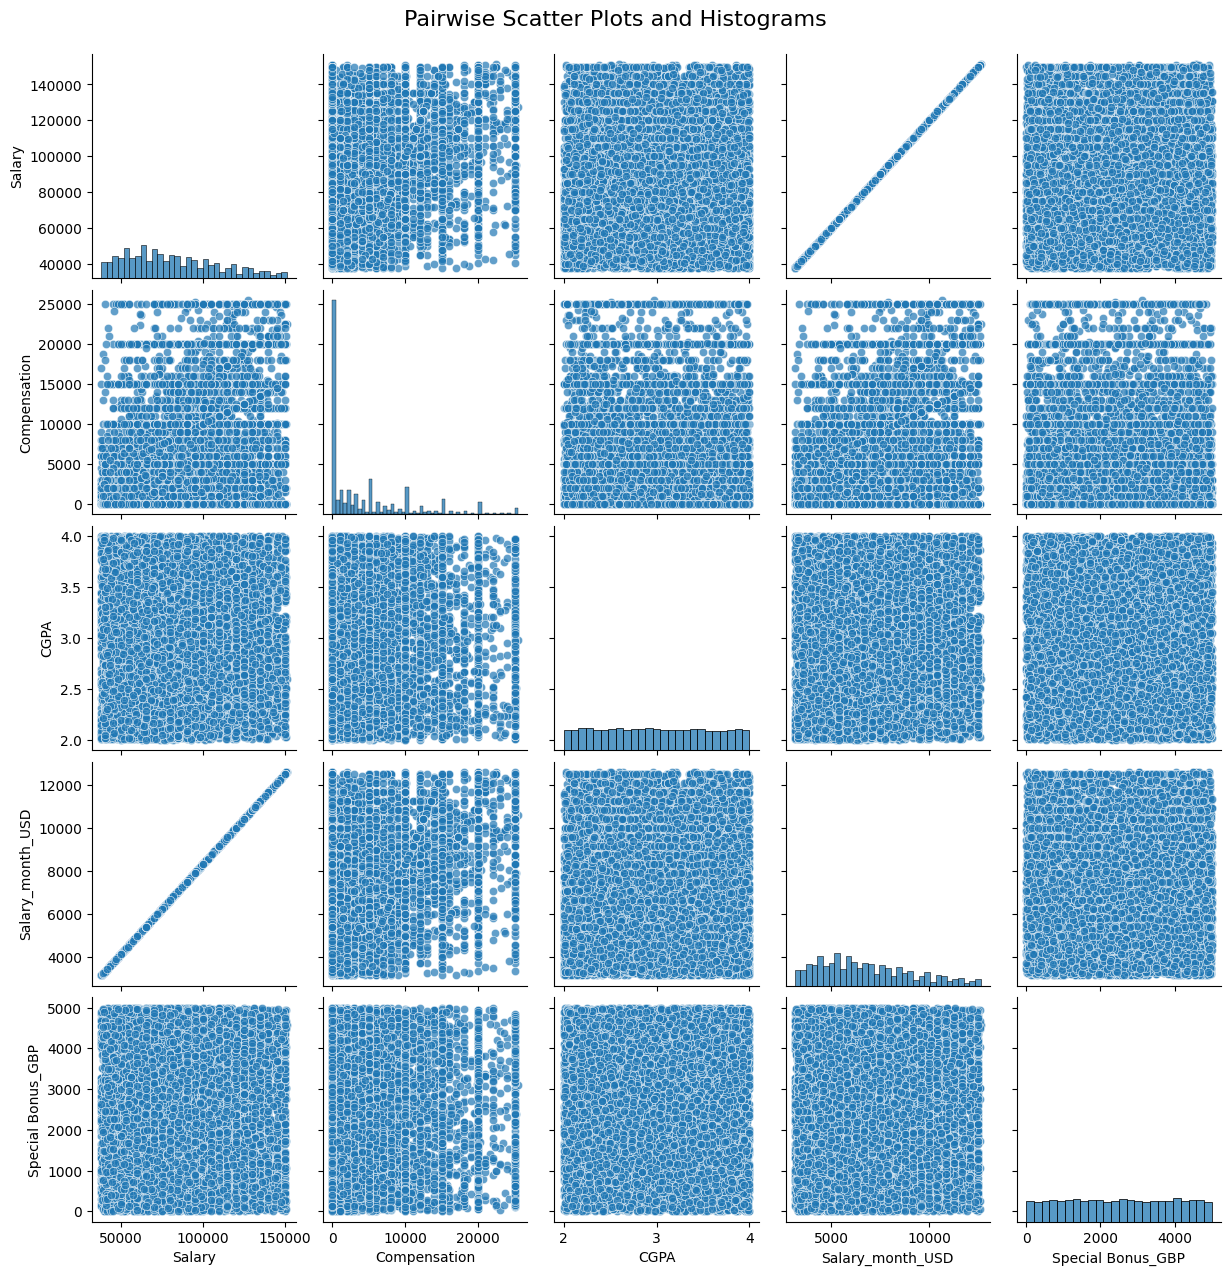

In [32]:
#this one better and more beautiful
#more customizable

#plot_ksw = add keywords argument alpha=0.7 makes the dots semi transparent,easier to visualize if got dense datapoints
sns.pairplot(df_numerical,diag_kind='hist',plot_kws={'alpha':0.7})
#suptitle add super title ,y=1.02 means move the title up a bit
plt.suptitle('Pairwise Scatter Plots and Histograms',y = 1.02,fontsize = 16)
plt.show()

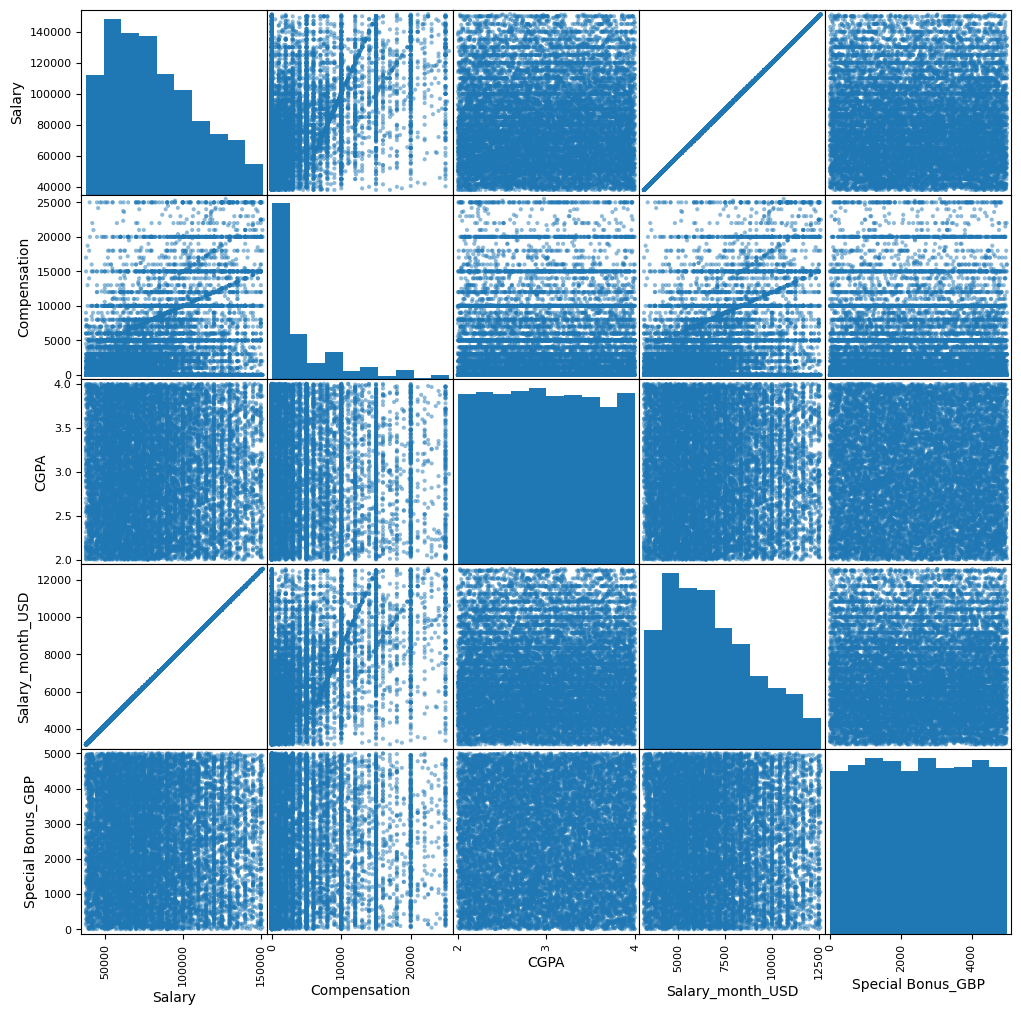

In [33]:
# It is used to create a matrix of scatter plots, where each scatter plot shows the relationship between pairs of numerical columns in the DataFrame.
# more basic and quicker to visualize
#less customizable
from pandas.plotting import scatter_matrix
scatter_matrix(df_master,figsize=(12,12))
plt.show()

#correlation analysis

In [34]:
df_numerical.corr()

,Salary,Compensation,CGPA,Salary_month_USD,Special Bonus_GBP
Salary,1.000000,0.411829,0.005361,1.000000,0.001906
Compensation,0.411829,1.000000,-0.012784,0.411829,-0.001833
CGPA,0.005361,-0.012784,1.000000,0.005361,0.004139
Salary_month_USD,1.000000,0.411829,0.005361,1.000000,0.001906
Special Bonus_GBP,0.001906,-0.001833,0.004139,0.001906,1.000000


pearson-non ranked and raw data

spearman ,it ranked the data start from 1,2,3.

pearson sensitive to outlier

spearman less sensitive

pearson suitable for continuous, normally distributed data

spearman suitable for ordinal, non-linear, or non-parametric data

In [35]:
df_numerical.corr(method = 'pearson')

,Salary,Compensation,CGPA,Salary_month_USD,Special Bonus_GBP
Salary,1.000000,0.411829,0.005361,1.000000,0.001906
Compensation,0.411829,1.000000,-0.012784,0.411829,-0.001833
CGPA,0.005361,-0.012784,1.000000,0.005361,0.004139
Salary_month_USD,1.000000,0.411829,0.005361,1.000000,0.001906
Special Bonus_GBP,0.001906,-0.001833,0.004139,0.001906,1.000000


In [36]:
df_numerical.corr(method = 'spearman')

,Salary,Compensation,CGPA,Salary_month_USD,Special Bonus_GBP
Salary,1.000000,0.334234,0.005788,1.000000,0.002990
Compensation,0.334234,1.000000,-0.004313,0.334234,0.005093
CGPA,0.005788,-0.004313,1.000000,0.005788,0.004171
Salary_month_USD,1.000000,0.334234,0.005788,1.000000,0.002990
Special Bonus_GBP,0.002990,0.005093,0.004171,0.002990,1.000000
